In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
import scienceplots
plt.style.use('science')


from neutrowater import diffusing_neutrons as dn
from neutrowater.post import measure, plot
from neutrowater.models.maxwell_boltzmann import MaxwellBoltzmann

In [39]:
params = dn.Parameters(
            nNeutrons=10, 
            radius_tank=0.225, 
            height_tank=0.85, 
            position_tank=(0, 0, -0.175)
            )

  0%|          | 0/10 [00:00<?, ?it/s]

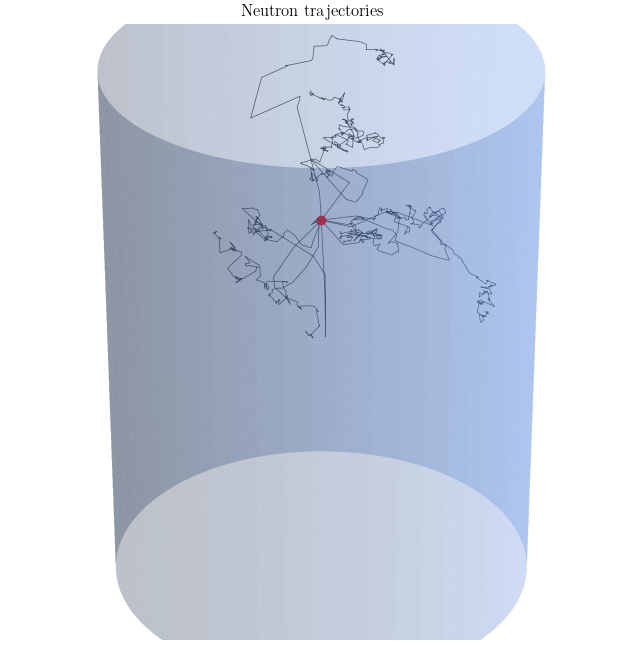

In [40]:
params.nNeutrons = 10
neutrons = dn.DiffusingNeutrons(params)
neutrons.diffuse(nCollisions=1000000)

measurer = measure.Measurer(neutrons)
plot.trajectories(neutrons)


  0%|          | 0/14 [00:00<?, ?it/s]

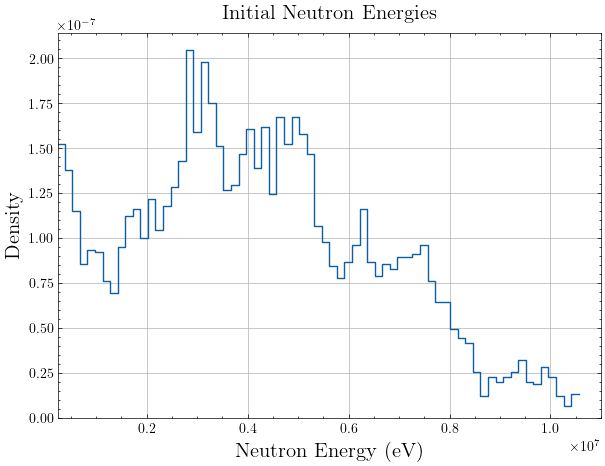

In [41]:
params.nNeutrons = 5000
diffusing_neutrons = dn.DiffusingNeutrons(params)
diffusing_neutrons.diffuse(nCollisions=1000000)
meas = measure.Measurer(diffusing_neutrons)

initial_energies = [energies[0] for energies in meas.energies()]

plt.figure(figsize= (7, 5))
sns.histplot(
    data=initial_energies, element="step", fill=False, stat="density", bins=70
)
plt.title("Initial Neutron Energies", fontsize=15, pad=10)
plt.ylabel("Density", fontsize=15)
plt.xlabel("Neutron Energy (eV)", fontsize=15)
plt.grid(True)
plt.xlim(10**5.4, 1.1*10**7)
plt.show()

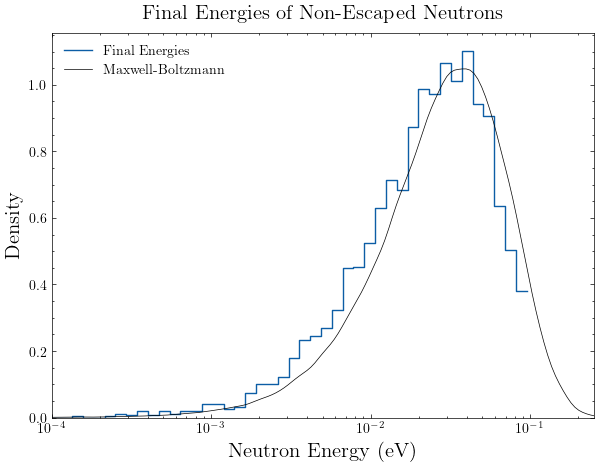

In [42]:
mw = MaxwellBoltzmann()

final_energies = [energies[-1] for energies in meas.energies()]
mw_energies = [mw.thermal_energy() for _ in range(100000)]
plt.figure(figsize= (7, 5))
plt.title("Final Energies of Non-Escaped Neutrons", fontsize=15, pad=10)
sns.histplot(
    data=sorted(final_energies)[:-meas.number_escaped()],
    log_scale=True, element="step", fill=False, stat="density", bins=50, label = "Final Energies"
)
sns.kdeplot(mw_energies, label="Maxwell-Boltzmann", color="k", log_scale=True, linewidth=0.5)
plt.xlim(10**-4, 10**-0.6)
plt.ylabel("Density", fontsize=15)
plt.xlabel("Neutron Energy (eV)", fontsize=15)
plt.legend()
plt.show()

In [48]:
params.nNeutrons = 10000
diffusing_neutrons = dn.DiffusingNeutrons(params)
diffusing_neutrons.diffuse(nCollisions=5000)

  0%|          | 0/14 [00:00<?, ?it/s]

In [47]:
meas = measure.Measurer(diffusing_neutrons)

print(f"Total: {meas.number_total()}")
print(f"Thermal: {meas.number_thermal()}")
print(f"Absorbed: {meas.number_absorbed()}")
print(f"Escaped: {meas.number_escaped()}")


AttributeError: 'Measurer' object has no attribute 'Measurer'

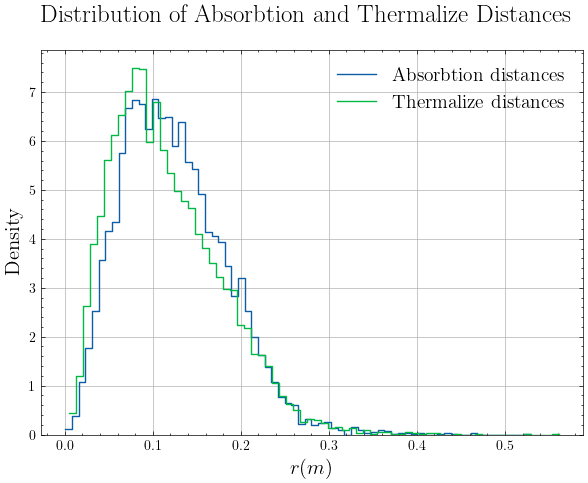

In [46]:
plt.figure(figsize=(7, 5))

sns.histplot(meas.absorbed_distances(), label="Absorbtion distances", bins=70, stat="density", fill=False, element="step")
sns.histplot(meas.thermalize_distances(), label="Thermalize distances", bins=70, stat="density", fill=False, element="step")
plt.ylabel("Density", fontsize=15)
plt.xlabel("$r (m)$", fontsize=15)
#axs[0].set_xlim(0, diffusing_neutrons.tank.radius+0.01)
plt.grid(True)
plt.title("Distribution of Absorbtion and Thermalize Distances", fontsize=18, pad=20, loc="left")
plt.legend(fontsize=14)

plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

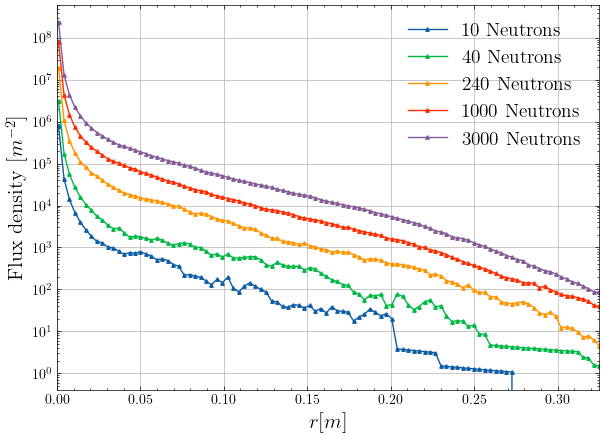

In [9]:
plt.figure(figsize= (7, 5))

for n in [10, 40, 240, 1000, 3000]:
    params.nNeutrons = n
    diffusing_neutrons = dn.DiffusingNeutrons(params)
    diffusing_neutrons.diffuse(nCollisions=5000)
    meas = measure.Measurer(diffusing_neutrons)
    radii = np.linspace(0.001, diffusing_neutrons.tank.radius+0.1, 100)
    fluxes = [meas.flux(r) for r in radii]

    plt.plot(radii, fluxes, "-^", markersize=2.5, label = f"{n} Neutrons")
plt.ylabel("Flux density [$m^{-2}$]", fontsize=15)
plt.xlabel("$r [m]$", fontsize=15)
plt.grid(True)
plt.yscale("log")
plt.xlim(0, diffusing_neutrons.tank.radius+0.1)
plt.legend(fontsize=14)
plt.show()

In [5]:
params.nNeutrons = 50000
diffusing_neutrons = dn.DiffusingNeutrons(params)
diffusing_neutrons.diffuse(nCollisions=5000)

  0%|          | 0/14 [00:00<?, ?it/s]

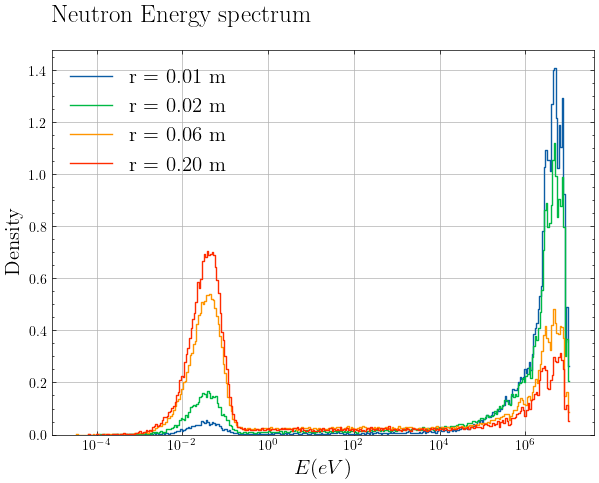

In [6]:
meas = measure.Measurer(diffusing_neutrons)
plt.figure(figsize= (7, 5))
radii = [0.01, 0.02, 0.06, 0.2]

for radius in radii:
    sns.histplot(
    data=meas.energy_spectrum(r=radius),
    log_scale=True, element="step", fill=False, stat="density", bins=300, label = f"r = {radius:.2f} m"
)
plt.ylabel("Density", fontsize=15)
plt.xlabel("$E (eV)$", fontsize=15)

plt.title("Neutron Energy spectrum", fontsize=18, pad=20, loc="left")
plt.legend(fontsize=15)
plt.grid(True)
plt.show()


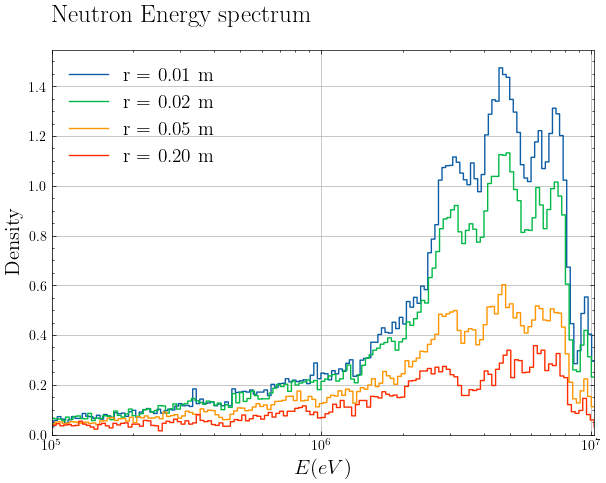

In [7]:
plt.figure(figsize= (7, 5))
radii = [0.01, 0.02, 0.05, 0.2]
for radius in radii:
    sns.histplot(
    data=meas.energy_spectrum(r=radius),
    log_scale=True, element="step", fill=False, stat="density", bins=800, label = f"r = {radius:.2f} m"
)
plt.ylabel("Density", fontsize=15)
plt.xlabel("$E (eV)$", fontsize=15)

plt.xlim(10**5, 10**7.01)
plt.title("Neutron Energy spectrum", fontsize=18, pad=20, loc="left")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [8]:
meas = measure.Measurer(diffusing_neutrons)
radii = np.linspace(0.001, diffusing_neutrons.tank.radius, 50)

fig, (ax, ax2) = plt.subplots(1,2, sharey=True, figsize=(12, 5))

def update(i):
    ax.clear()
    ax2.clear()
    radius = radii[i]
    sns.histplot(
        data=meas.energy_spectrum(r=radius),
        log_scale=True, element="step", fill=False, stat="density", bins=800, label = f"r = {radius:.2f} m",
        ax=ax
    )
    sns.histplot(
        data=meas.energy_spectrum(r=radius),
        log_scale=True, element="step", fill=False, stat="density", bins=800, label = f"r = {radius:.2f} m",
        ax=ax2
    )
    ax.set_xlim(10**-3, 10**0.01)
    ax2.set_xlim(10**4, 10**7.1)
    ax.set_ylim(0, 2.3)
    ax2.set_ylim(0, 2.3)

    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax.yaxis.tick_left()
    ax.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.yaxis.tick_right()

    ax.set_ylabel("Density", fontsize=15)
    ax.set_xlabel("$E (eV)$", fontsize=15)
    
    ax.set_title("Neutron Energy spectrum", fontsize=18, pad=20, loc="left")
    ax.legend(fontsize=17)
    ax.grid(True)
    ax2.grid(True)
    fig.subplots_adjust(wspace=0.1)

# Assign the FuncAnimation object to a variable at the global scope
ani = FuncAnimation(fig, update, frames=len(radii), repeat=True)

ani.save('neutron_energy_spectrum.gif')

plt.close(fig)

MovieWriter ffmpeg unavailable; using Pillow instead.


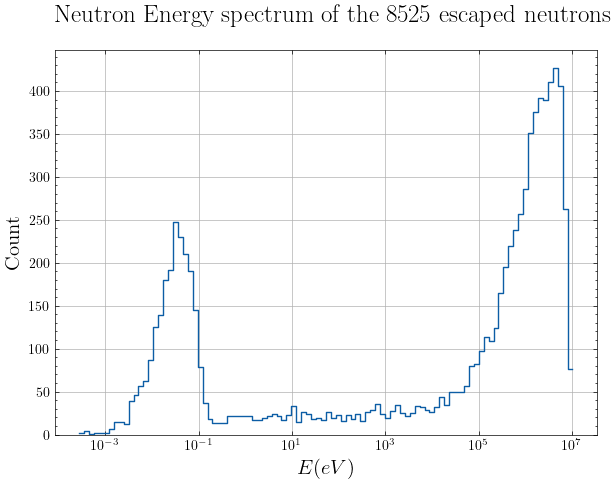

In [9]:
plt.figure(figsize= (7, 5))
sns.histplot(
    data=meas.energy_spectrum_escaped(),
    log_scale=True, element="step", fill=False, stat="count", bins=100
)
plt.ylabel("Count", fontsize=15)
plt.xlabel("$E (eV)$", fontsize=15)

#plt.xlim(10**5, 10**7.01)
plt.title(f"Neutron Energy spectrum of the {meas.number_escaped()} escaped neutrons", fontsize=18, pad=20, loc="left")
plt.grid(True)
plt.show()